In [1]:
%matplotlib inline
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
# pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))
pd.set_option('display.max_columns', None) #输出所有列

def set_ch():
    from pylab import mpl
    #中文字体问题已经解决，记录在evernote中
    #mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
set_ch()
from datetime import datetime,timedelta
import matplotlib
matplotlib.style.use('ggplot')
import sys
import json
import seaborn as sns

In [2]:
# import data
df_all = pd.read_csv('data/all.csv').drop(['Unnamed: 0'], axis=1)
df_part = pd.concat([df_all.iloc[:, :23], df_all.iloc[:, 71:]], axis=1)

In [26]:
# standardization & normalization
from sklearn import preprocessing
def processing(df, exp):
    X = df.values
    if exp == 'standardization':
        scaler = preprocessing.StandardScaler().fit(X)
        X_ = scaler.transform(X)
    elif exp == 'normalization':
        scaler = preprocessing.MinMaxScaler().fit(X)
        X_ = scaler.transform(X)
    else:
        raise Exception("Unknown type")
    df_ = pd.DataFrame(X_)
    df_.columns = df.columns.values
    return df_

In [111]:
df_all.iloc[:, 6:-9].head(2)

,par_days,actual_day,sub_tol,sub_avg,sub_avg_a,ex_tol,ex_subrate,sub_ins_sd,sub_ins_m,ins_m,auc_sub_avg,auc_sub_sd,ins_max,ins_summit_four_1,ins_summit_four_2,ins_summit_four_3,ins_summit_max,0point_sub,1point_sub,2point_sub,3point_sub,4point_sub,5point_sub,6point_sub,7point_sub,8point_sub,9point_sub,10point_sub,11point_sub,12point_sub,13point_sub,14point_sub,15point_sub,16point_sub,17point_sub,18point_sub,19point_sub,20point_sub,21point_sub,22point_sub,23point_sub,0point_ex,1point_ex,2point_ex,3point_ex,4point_ex,5point_ex,6point_ex,7point_ex,8point_ex,9point_ex,10point_ex,11point_ex,12point_ex,13point_ex,14point_ex,15point_ex,16point_ex,17point_ex,18point_ex,19point_ex,20point_ex,21point_ex,22point_ex,23point_ex,notscWe_sub,notscWe_ex,notscWd_sub,notscWd_ex,sc_sub,sc_ex,pub_avg,pub_sd,n_ex,n_pkg,n_pra_ex_avg,n_pra_ex_sd
0,91.999994,16,89,0.967391,5.5625,509,0.647926,269.284575,179.550562,2.033708,97.156679,8.085544,43,25.00,102.0,201.00,1562,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,62,18,2,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,19,366,97,15,0,44.0,248.0,3.0,13.0,42.0,248.0,4.122255,2.054635,391,25,1.30179,0.604235
1,91.499994,18,180,1.967213,10.0000,1032,0.538399,145.235432,128.694444,1.000000,98.138889,9.697912,25,67.75,101.0,156.25,1427,0,0,0,0,0,0,0,0,4,0,0,0,0,0,10,3,0,0,0,73,63,27,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,60,9,0,0,0,424,356,163,0,0,18.0,95.0,120.0,693.0,42.0,244.0,2.796135,1.737008,501,28,2.05988,0.977961


In [112]:
df_X = df_all.iloc[:, 6:-9]
df_X = pd.concat([df_X,
           pd.get_dummies(df_part.visa_typ_cd),
           pd.get_dummies(df_part.year),
           pd.get_dummies(df_part.delta_lable),
           pd.get_dummies(df_part.level)],
           axis=1)

In [113]:
df_X.head(2)

,par_days,actual_day,sub_tol,sub_avg,sub_avg_a,ex_tol,ex_subrate,sub_ins_sd,sub_ins_m,ins_m,auc_sub_avg,auc_sub_sd,ins_max,ins_summit_four_1,ins_summit_four_2,ins_summit_four_3,ins_summit_max,0point_sub,1point_sub,2point_sub,3point_sub,4point_sub,5point_sub,6point_sub,7point_sub,8point_sub,9point_sub,10point_sub,11point_sub,12point_sub,13point_sub,14point_sub,15point_sub,16point_sub,17point_sub,18point_sub,19point_sub,20point_sub,21point_sub,22point_sub,23point_sub,0point_ex,1point_ex,2point_ex,3point_ex,4point_ex,5point_ex,6point_ex,7point_ex,8point_ex,9point_ex,10point_ex,11point_ex,12point_ex,13point_ex,14point_ex,15point_ex,16point_ex,17point_ex,18point_ex,19point_ex,20point_ex,21point_ex,22point_ex,23point_ex,notscWe_sub,notscWe_ex,notscWd_sub,notscWd_ex,sc_sub,sc_ex,pub_avg,pub_sd,n_ex,n_pkg,n_pra_ex_avg,n_pra_ex_sd,A,A1,A2,A3,B,C,D1,D2,D3,2013,2014,2015,2016,2017,2018,1m,1y,2y,3m,3y,3ypl,6m,1st,2nd,3rd,4th,new1
0,91.999994,16,89,0.967391,5.5625,509,0.647926,269.284575,179.550562,2.033708,97.156679,8.085544,43,25.00,102.0,201.00,1562,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,62,18,2,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,19,366,97,15,0,44.0,248.0,3.0,13.0,42.0,248.0,4.122255,2.054635,391,25,1.30179,0.604235,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,91.499994,18,180,1.967213,10.0000,1032,0.538399,145.235432,128.694444,1.000000,98.138889,9.697912,25,67.75,101.0,156.25,1427,0,0,0,0,0,0,0,0,4,0,0,0,0,0,10,3,0,0,0,73,63,27,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,60,9,0,0,0,424,356,163,0,0,18.0,95.0,120.0,693.0,42.0,244.0,2.796135,1.737008,501,28,2.05988,0.977961,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [114]:
# 标准化
df_Xstd = processing(df_X, 'standardization')

In [115]:
X_std = df_Xstd.values
y = df_part.y

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report,f1_score,auc,roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import  GridSearchCV

In [120]:
# logistic regression
def LR(X,y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    lr = LogisticRegression(penalty = 'l1')
    print ('training...')
    lr.fit(X_train,Y_train)
    Y_pred = lr.predict(X_test)
    print ('predict finished')

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(Y_test,Y_pred)
    F1 = f1_score(Y_test, Y_pred)
    auc_score = auc(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_pred)
    
    
    return (Y_pred, lr, cnf_matrix, F1, auc_score, roc_auc)

In [125]:
def LR_train(X,y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    lr = LogisticRegression(penalty = 'l1')
    print ('training...')
    lr.fit(X_train,Y_train)
    Y_pred = lr.predict(X_test)
    print ('predict finished')
    
    return (Y_pred, Y_test)

In [134]:
def LR_evaluate(y_test,y_pred):
    print ('evaluating...')
    cnf_matrix = confusion_matrix(y_test,y_pred)
    F1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print ('evaluate finished')
    
    return (cnf_matrix, F1, roc_auc)

In [127]:
Y_pred, Y_test = LR_train(X_std,y)

training...
predict finished


In [135]:
cnf_matrix, F1, roc_auc = LR_evaluate(Y_pred, Y_test.values)

evaluating...
evaluate finished


In [136]:
roc_auc

0.8314038216545594

In [129]:
Y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [131]:
Y_test.values

array([0., 0., 1., ..., 1., 1., 1.])

In [76]:
cnf_matrix_std

array([[  6034,   9179],
       [  2139, 111640]])

In [118]:
coef_li = []
F1_std_li = []
intercept_li = []
for i in np.arange(1,11):
    y_pred_std, lr_std, cnf_matrix_std, F1_std = LR(X_std,y)
    coef_li.append(lr_std.coef_)
    F1_std_li.append(F1_std)
    intercept_li.append(lr_std.intercept_)

training...
predict finished
training...
predict finished
training...
predict finished
training...
predict finished
training...
predict finished
training...
predict finished
training...
predict finished
training...
predict finished
training...
predict finished
training...
predict finished


,par_days,1st,new1,sub_tol,A,D2,ins_summit_four_2,sc_ex,2015,2014,2016,19point_sub,1m,sub_avg_a,21point_sub,3m,20point_ex,17point_sub,13point_sub,9point_sub,16point_sub,10point_ex,22point_sub,pub_avg,18point_sub,14point_sub,6point_ex,5point_sub,20point_sub,13point_ex,17point_ex,11point_ex,D1,auc_sub_sd,ins_summit_four_3,7point_sub,22point_ex,0point_sub,sub_ins_sd,sub_ins_m,16point_ex,ex_tol,15point_ex,notscWd_ex,2point_ex,12point_sub,2013,3point_sub,15point_sub,6m,11point_sub,10point_sub,14point_ex,6point_sub,7point_ex,21point_ex,3point_ex,8point_ex,D3,1point_sub,23point_sub,A3,4point_sub,1point_ex,9point_ex,notscWe_ex,4point_ex,23point_ex,ins_summit_max,2point_sub,8point_sub,A1,12point_ex,18point_ex,19point_ex,A2,n_pra_ex_sd,ins_m,n_pkg,0point_ex,5point_ex,2018,4th,1y,sc_sub,3rd,3y,3ypl,pub_sd,auc_sub_avg,ex_subrate,2017,n_pra_ex_avg,ins_summit_four_1,sub_avg,ins_max,C,notscWd_sub,2y,notscWe_sub,2nd,n_ex,B,actual_day
weight,-1.206364,-0.627706,-0.36083,-0.297092,-0.284725,-0.267611,-0.252873,-0.244842,-0.195522,-0.193019,-0.16059,-0.158833,-0.156032,-0.130446,-0.121845,-0.113159,-0.088987,-0.086396,-0.0751,-0.073353,-0.069855,-0.064695,-0.064438,-0.057482,-0.057138,-0.0564,-0.050625,-0.043708,-0.041959,-0.040471,-0.039994,-0.039955,-0.039526,-0.037799,-0.035525,-0.035426,-0.033135,-0.032353,-0.030287,-0.028683,-0.028073,-0.026982,-0.026107,-0.023691,-0.021178,-0.019736,-0.016629,-0.014906,-0.014417,-0.013353,-0.01165,-0.011518,-0.010976,-0.00799,-0.00602,-0.005045,-0.004817,-0.004792,-0.00164,-0.000674,-0.000271,0.003525,0.003833,0.003945,0.004501,0.00628,0.007054,0.010579,0.015959,0.017368,0.017988,0.019635,0.021103,0.023369,0.024109,0.027907,0.030409,0.035242,0.035375,0.044083,0.047389,0.069749,0.072873,0.102344,0.103954,0.114427,0.141152,0.142973,0.152122,0.153107,0.198354,0.205441,0.216448,0.247691,0.27734,0.288739,0.289188,0.359137,0.397345,0.448494,0.459873,0.509337,0.547526,0.580062


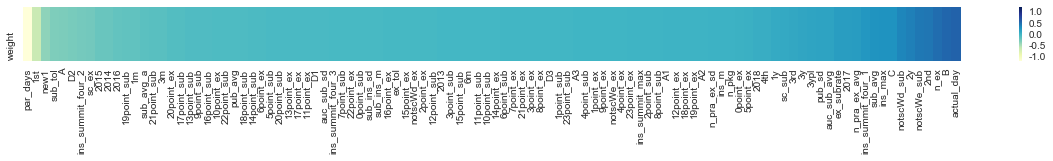

In [137]:
coef_avg = (coef_li[0] + coef_li[1] + coef_li[2] + coef_li[3] + coef_li[4] + 
            coef_li[5] + coef_li[6] + coef_li[7] + coef_li[8] + coef_li[9])/10
intercept_avg = np.array(intercept_li).cumsum()[-1] / 10
df_weight_std = pd.DataFrame(coef_avg.T)
df_weight_std.index = df_Xstd.columns.values
df_weight_std.columns = ['weight']

# plot weight
plt.rc('figure', figsize=(21, 1))
sns.heatmap(df_weight_std.sort_values(by=['weight']).T,cmap="YlGnBu")
df_weight_std.sort_values(by=['weight']).T

In [75]:
np.mean(F1_std_li)

0.9517584503897961

In [78]:
len(df_Xstd.columns)

59

比较显著的几个特征是：   
par_days(-1.19):实际隔了多少天开始做作业     
sub_tol(-0.75):总的提交次数    
1st(-0.44):一级城市        

2nd(0.65):二级城市    
B(0.61):B套餐  
actual_day(0.56): 实际使用了多长时间（Day）    
n_ex(0.46):总的做题数     
notscWe_sub(0.45):周末的做题数量    

In [43]:
# calculate probability
std_ = np.sum(X_std * coef_avg, axis=1) + intercept_avg
df_Xstd['wTx'] = std_
df_Xstd['probability'] = 1.0 / (1.0  + np.exp(-std_))

In [46]:
# lable the student
lable_li_std = []
for i in range(len(df_Xstd)):
    if df_Xstd.probability[i] < 0.1:
        lable_li_std.append('0')
    elif df_Xstd.probability[i] > 0.9:
        lable_li_std.append('1')
    else:
        lable_li_std.append('0.5')
        
df_Xstd['lable'] = lable_li_std
df_X['lable'] = lable_li_std

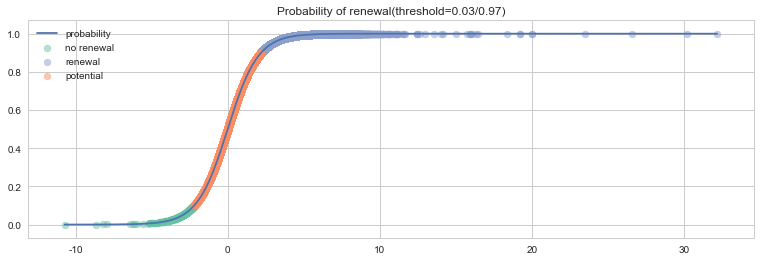

In [47]:
# standardization
df_sorted_std = DataFrame()
df_sorted_std['wTx'] = np.sort(np.sum(X_std * lr_std.coef_, axis=1) + lr_std.intercept_)
df_sorted_std['probability'] = 1.0 / (1.0  + np.exp(-(df_sorted_std.wTx)))

sns.set_style("whitegrid")
plt.rc('figure', figsize=(13, 4))
plt.plot(df_sorted_std.wTx, df_sorted_std.probability)
plt.scatter(df_sorted_std[df_sorted_std.probability<0.1].wTx, df_sorted_std[df_sorted_std.probability<0.1].probability, 
            marker='o',alpha=0.5, color=sns.color_palette("Set2", 10)[0], label='no renewal')
plt.scatter(df_sorted_std[df_sorted_std.probability>0.9].wTx, df_sorted_std[df_sorted_std.probability>0.9].probability, 
            marker='o',alpha=0.5, color=sns.color_palette("Set2", 10)[2], label='renewal')
plt.scatter(df_sorted_std[(df_sorted_std.probability>0.1)&(df_sorted_std.probability<0.9)].wTx, 
            df_sorted_std[(df_sorted_std.probability>0.1)&(df_sorted_std.probability<0.9)].probability, 
            marker='o',alpha=0.5, color=sns.color_palette("Set2", 10)[1], label='potential')
plt.title("Probability of renewal(threshold=0.03/0.97)")
plt.legend()

In [48]:
print ('no renewal: %s' % len(df_Xstd[df_Xstd.lable == '0']))
print ('renewal: %s' % len(df_Xstd[df_Xstd.lable == '1']))
print ('potential: %s' % len(df_Xstd[df_Xstd.lable == '0.5']))

no renewal: 897
renewal: 292053
potential: 137021


In [49]:
[len(df_Xstd[df_Xstd.lable == '0'])/len(df_all[df_all.y == 0]),
len(df_Xstd[df_Xstd.lable == '1'])/len(df_all[df_all.y == 1])]

[0.01771187110022905, 0.7699241024235027]

#### 统计结果

①一天的时间段内的提交数 和 做题数

In [56]:
df_all['lable'] = df_X.lable

In [57]:
df_all.head(2)

,stu_id,visa_typ_cd,usr_visa_strt_tm,usr_visa_end_tm,group,min_time,par_days,actual_day,sub_tol,sub_avg,sub_avg_a,ex_tol,ex_subrate,sub_ins_sd,sub_ins_m,ins_m,auc_sub_avg,auc_sub_sd,ins_max,ins_summit_four_1,ins_summit_four_2,ins_summit_four_3,ins_summit_max,0point_sub,1point_sub,2point_sub,3point_sub,4point_sub,5point_sub,6point_sub,7point_sub,8point_sub,9point_sub,10point_sub,11point_sub,12point_sub,13point_sub,14point_sub,15point_sub,16point_sub,17point_sub,18point_sub,19point_sub,20point_sub,21point_sub,22point_sub,23point_sub,0point_ex,1point_ex,2point_ex,3point_ex,4point_ex,5point_ex,6point_ex,7point_ex,8point_ex,9point_ex,10point_ex,11point_ex,12point_ex,13point_ex,14point_ex,15point_ex,16point_ex,17point_ex,18point_ex,19point_ex,20point_ex,21point_ex,22point_ex,23point_ex,notscWe_sub,notscWe_ex,notscWd_sub,notscWd_ex,sc_sub,sc_ex,pub_avg,pub_sd,n_ex,n_pkg,n_pra_ex_avg,n_pra_ex_sd,y,top_schl_id,school,delta_days,year,delta_lable,province,level,lable
0,64005,A,2016-06-19 00:00:00,2016-12-19 23:59:59,1625.0,2016-06-19 09:18:16,91.999994,16,89,0.967391,5.5625,509,0.647926,269.284575,179.550562,2.033708,97.156679,8.085544,43,25.00,102.0,201.00,1562,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,62,18,2,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,19,366,97,15,0,44.0,248.0,3.0,13.0,42.0,248.0,4.122255,2.054635,391,25,1.30179,0.604235,1.0,432590.0,down,183,2016,6m,北京市,1st,0.5
1,64005,A1,2016-12-24 00:00:00,2017-06-24 23:59:59,1626.0,2016-12-24 20:21:05,91.499994,18,180,1.967213,10.0000,1032,0.538399,145.235432,128.694444,1.000000,98.138889,9.697912,25,67.75,101.0,156.25,1427,0,0,0,0,0,0,0,0,4,0,0,0,0,0,10,3,0,0,0,73,63,27,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,60,9,0,0,0,424,356,163,0,0,18.0,95.0,120.0,693.0,42.0,244.0,2.796135,1.737008,501,28,2.05988,0.977961,1.0,436223.0,down,182,2017,6m,临汾市,4th,1


In [61]:
# 以年份来划分记录
df_13 = df_all[df_all.year == 2013]
df_14 = df_all[df_all.year == 2014]
df_15 = df_all[df_all.year == 2015]
df_16 = df_all[df_all.year == 2016]
df_17 = df_all[df_all.year == 2017]
df_18 = df_all[df_all.year == 2018]

print ("2013 record number:%s, renewal number:%s, not renewl:%s" % 
       (len(df_13), len(df_13[df_13.lable=='1']), len(df_13[df_13.lable=='0'])))
print ("2014 record number:%s, renewal number:%s, not renewl:%s" % 
       (len(df_14), len(df_14[df_14.lable=='1']), len(df_14[df_14.lable=='0'])))
print ("2015 record number:%s, renewal number:%s, not renewl:%s" % 
       (len(df_15), len(df_15[df_15.lable=='1']), len(df_15[df_15.lable=='0'])))
print ("2016 record number:%s, renewal number:%s, not renewl:%s" % 
       (len(df_16), len(df_16[df_16.lable=='1']), len(df_16[df_16.lable=='0'])))
print ("2017 record number:%s, renewal number:%s, not renewl:%s" % 
       (len(df_17), len(df_17[df_17.lable=='1']), len(df_17[df_17.lable=='0'])))
print ("2018 record number:%s, renewal number:%s, not renewl:%s" % 
       (len(df_18), len(df_18[df_18.lable=='1']), len(df_18[df_18.lable=='0'])))

2013 record number:1492, renewal number:449, not renewl:7
2014 record number:12347, renewal number:2773, not renewl:412
2015 record number:32563, renewal number:16447, not renewl:303
2016 record number:66999, renewal number:35908, not renewl:131
2017 record number:218528, renewal number:163764, not renewl:28
2018 record number:98042, renewal number:72712, not renewl:16


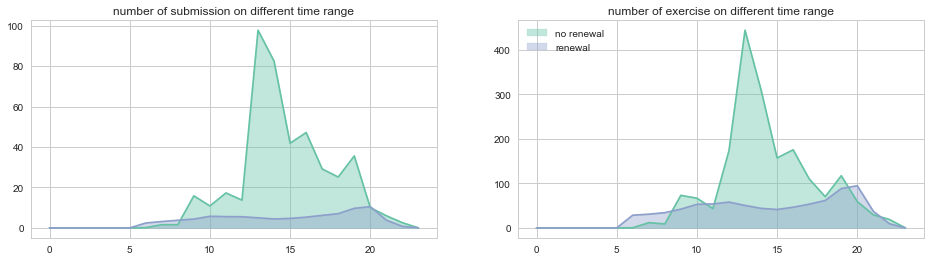

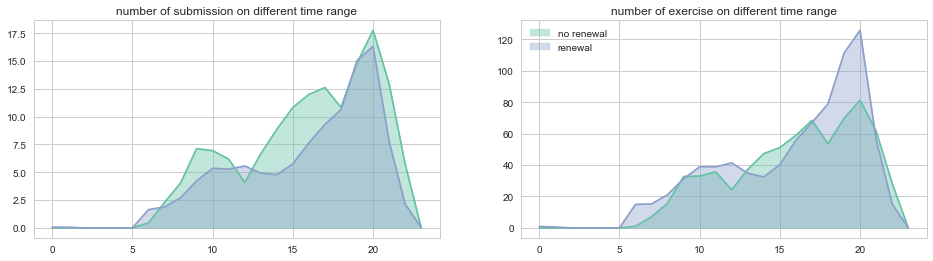

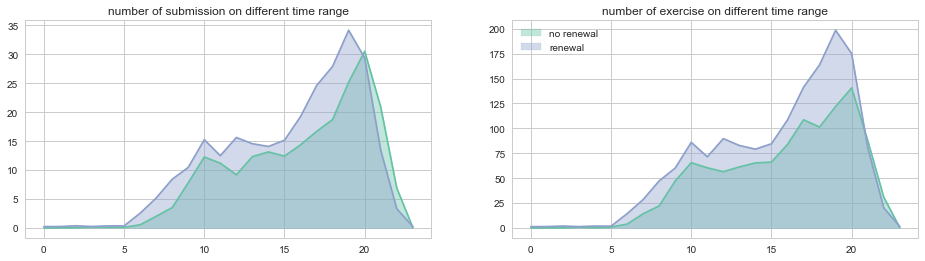

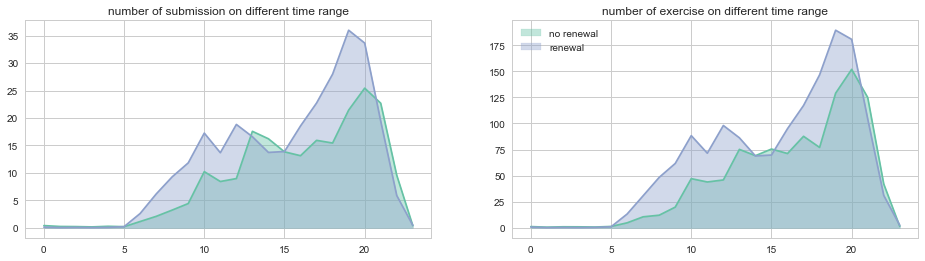

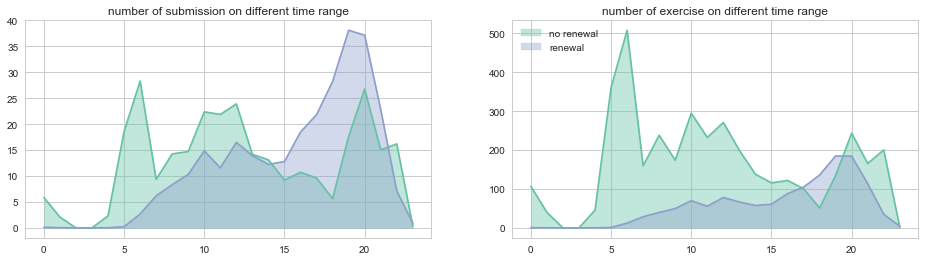

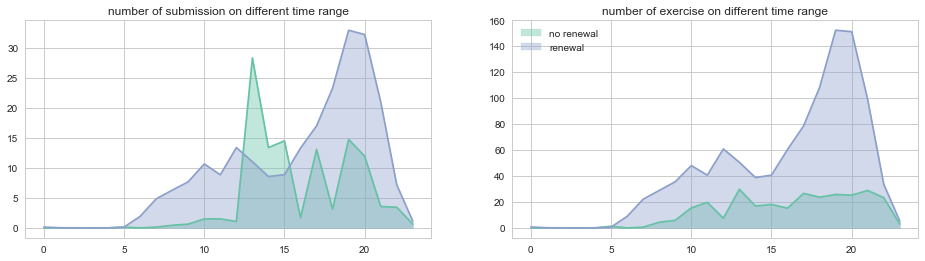

In [70]:
# 不同年份在一天的时间段内提交数和做题数
for i in ['df_13', 'df_14', 'df_15', 'df_16', 'df_17', 'df_18']:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    # number of submission
    eval('ax1.plot(np.arange(0,24),'+ i + '[' + i + '.lable == "0"].iloc[:,23:47].mean(axis=0),color=sns.color_palette("Set2", 10)[0])')
    eval('ax1.fill_between(np.arange(0,24),'+ i + '[' + i + '.lable == "0"].iloc[:,23:47].mean(axis=0),0,color=sns.color_palette("Set2", 10)[0], alpha=0.4, label="no renewal")')
    eval('ax1.plot(np.arange(0,24),'+ i + '[' + i + '.lable == "1"].iloc[:,23:47].mean(axis=0),color=sns.color_palette("Set2", 10)[2])')
    eval('ax1.fill_between(np.arange(0,24),'+ i + '[' + i + '.lable == "1"].iloc[:,23:47].mean(axis=0),0,color=sns.color_palette("Set2", 10)[2], alpha=0.4, label="renewal")')
    eval('ax1.set_title("number of submission on different time range")')

    # number of exercise
    eval('ax2.plot(np.arange(0,24),'+ i + '[' + i + '.lable == "0"].iloc[:,47:71].mean(axis=0),color=sns.color_palette("Set2", 10)[0])')
    eval('ax2.fill_between(np.arange(0,24),'+ i + '[' + i + '.lable == "0"].iloc[:,47:71].mean(axis=0),0,color=sns.color_palette("Set2", 10)[0], alpha=0.4, label="no renewal")')
    eval('ax2.plot(np.arange(0,24),'+ i + '[' + i + '.lable == "1"].iloc[:,47:71].mean(axis=0),color=sns.color_palette("Set2", 10)[2])')
    eval('ax2.fill_between(np.arange(0,24),'+ i + '[' + i + '.lable == "1"].iloc[:,47:71].mean(axis=0),0,color=sns.color_palette("Set2", 10)[2], alpha=0.4, label="renewal")')
    eval('ax2.set_title("number of exercise on different time range")')
    plt.legend(loc='upper left')    

In [71]:
# 生成新表
renewl_dic = {'"renewal"':'"1"', '"not renewal"':'"0"'}
sub_dic = {'sub':'"sub"', 'ex':'"ex"'}
period_dic = {'notscWd':'"workDay"', 'notscWe':'"weekDay"', 'sc':'"vacation"'}
year_li = ["2013", "2014", "2015", "2016", "2017", "2018"]

all_li = []
for year in year_li:
    for (period,p_label) in period_dic.items():
        for (sub,sub_label) in sub_dic.items():
            for (key,val) in renewl_dic.items():
                all_li.append(eval("[df_all[(df_all.lable ==" + val + ")&(df_all.year ==" +  year + ")]." + period + "_" + sub + ".mean(axis=0)," + year +"," + key + "," + p_label + "," + sub_label + "]"))

df_period = pd.DataFrame(all_li)
df_period.columns = ['number', 'year', 'renewal/not', 'period', 'sub/ex']

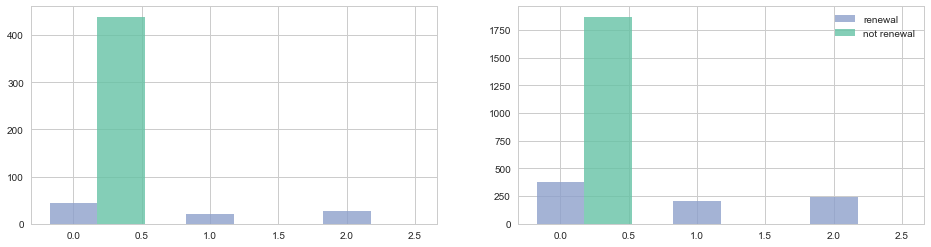

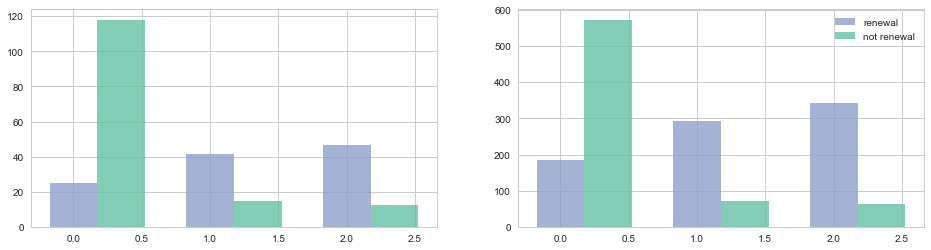

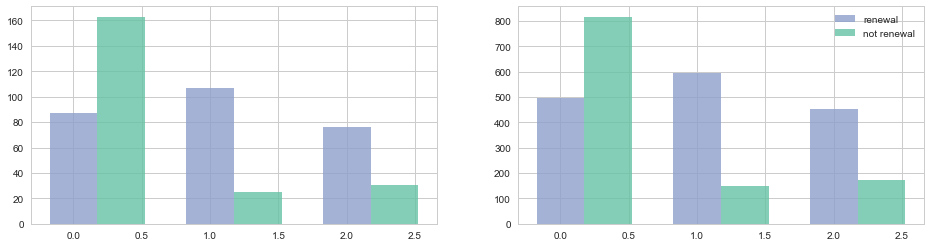

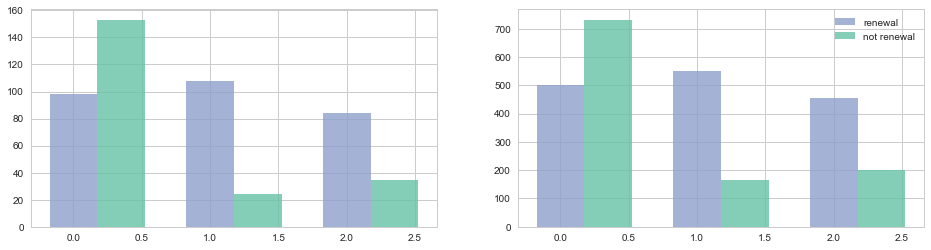

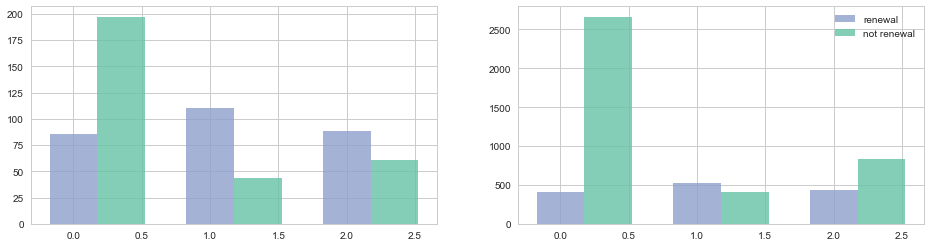

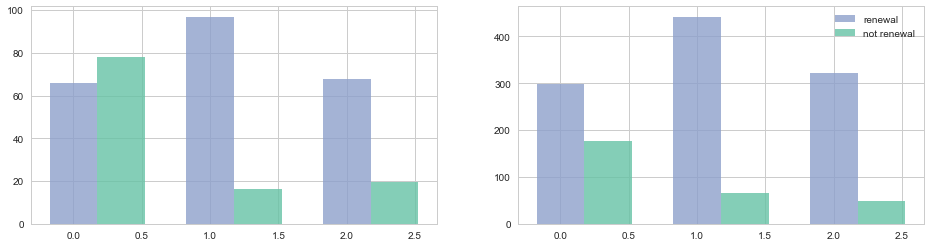

In [73]:
# 生成图
for year in [2013, 2014, 2015, 2016, 2017, 2018]:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    # submission
    ax1.bar(np.arange(0,3), df_period[(df_period['renewal/not'] == 'renewal') & 
                                  (df_period['sub/ex'] == 'sub') &
                                  (df_period.year == year)].number, 
                                  0.35,color=sns.color_palette("Set2", 10)[2],label='renewal',alpha=0.8)
    ax1.bar(np.arange(0,3)+0.35, df_period[(df_period['renewal/not'] == 'not renewal') & 
                                  (df_period['sub/ex'] == 'sub') &
                                  (df_period.year == year)].number, 
                                  0.35,color=sns.color_palette("Set2", 10)[0],label='not renewal', alpha=0.8)
    # exercise
    ax2.bar(np.arange(0,3), df_period[(df_period['renewal/not'] == 'renewal') & 
                                  (df_period['sub/ex'] == 'ex') &
                                  (df_period.year == year)].number, 
                                  0.35,color=sns.color_palette("Set2", 10)[2],label='renewal', alpha=0.8)
    ax2.bar(np.arange(0,3)+0.35, df_period[(df_period['renewal/not'] == 'not renewal') & 
                                  (df_period['sub/ex'] == 'ex') &
                                  (df_period.year == year)].number, 
                                  0.35,color=sns.color_palette("Set2", 10)[0],label='not renewal', alpha=0.8)
    plt.legend()

#### 查看套餐

In [209]:
df_weight_test = df_weight_std.sort_values(by='weight')

In [214]:
df_test = df_weight_test.abs().sort_values('weight', ascending=False)
df_test = pd.merge(df_test, df_weight_test, left_index=True, right_index=True)
df_test.columns = ['weight', 'noabs']
df_test = df_test.reset_index()

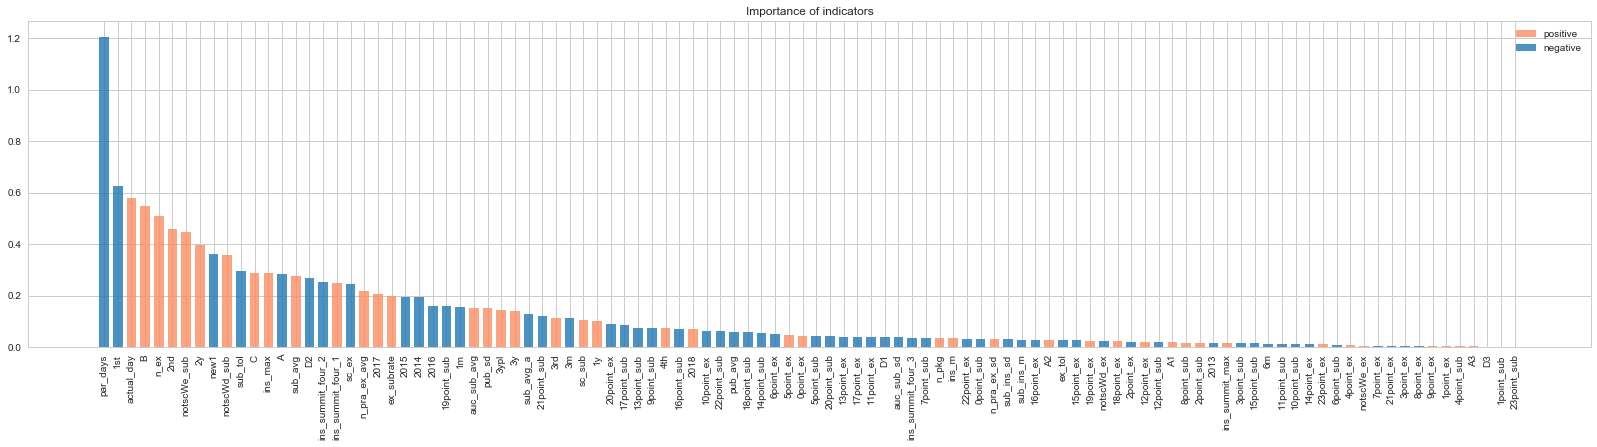

In [234]:
plt.rc('figure', figsize=(28, 6))
sns.set_style("whitegrid")
plt.bar(df_test[df_test.noabs >=0].index,
        df_test[df_test.noabs >=0].weight, 0.7,label='positive',alpha=0.8, color=sns.color_palette("Set2", 10)[1])
plt.bar(df_test[df_test.noabs <0].index,
        df_test[df_test.noabs <0].weight, 0.7,label='negative',alpha=0.8, color=sns.color_palette("Paired")[1])
plt.xticks(np.arange(0,104), df_test['index'].values,rotation=90)
plt.title("Importance of indicators")
plt.legend()